In [1]:
!pip install requests
!pip install beautifulsoup4
!pip install pandas

In [2]:
pip install requests beautifulsoup4 pandas

Note: you may need to restart the kernel to use updated packages.


In [12]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import os

# URL of the page that contains the Excel file
url = 'https://www.eia.gov/dnav/ng/hist/rngwhhdM.htm'

# Send a request to fetch the page content
response = requests.get(url)

# Parse the page using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find all links on the page
links = soup.find_all('a')

# Look for the link to the Excel file by checking for the .xls or .xlsx extension
excel_url = None
for link in links:
    href = link.get('href', '')
    if href.endswith('.xls') or href.endswith('.xlsx'):
        # Use urljoin to ensure the URL is complete
        excel_url = urljoin(url, href)
        break

# Check if we found the Excel URL
if excel_url:
    try:
        # Send a request to download the file
        file_response = requests.get(excel_url)
        file_response.raise_for_status()  # Raise an error if the request failed

        # Set the filename
        filename = os.path.basename(excel_url)

        # Save the file locally
        with open(filename, 'wb') as file:
            file.write(file_response.content)
        print(f"File downloaded successfully: {filename}")
    except requests.exceptions.RequestException as e:
        print(f"An error occurred while downloading the file: {e}")
else:
    print("Excel file not found on the page.")

File downloaded successfully: RNGWHHDm.xls


In [13]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Print the full file path
file_path = os.path.join(current_directory, 'RNGWHHDm.xls')
print(f"File is located at: {file_path}")

File is located at: C:\Users\hp\RNGWHHDm.xls


In [18]:
df = pd.read_excel(xls_file, sheet_name='Data 1')

In [22]:
import pandas as pd

# Load the Excel file
xls_file = r'C:\Users\hp\Downloads\RNGWHHDm.xls'

# Get all sheet names
xls = pd.ExcelFile(xls_file)
print(xls.sheet_names)

['Contents', 'Data 1']


In [25]:
import pandas as pd

# Load the Excel file
xls_file = r'C:\Users\hp\Downloads\RNGWHHDm.xls'

# Load the 'Data 1' sheet, skipping the first row to get correct headers
df = pd.read_excel(xls_file, sheet_name='Data 1', header=1)

# Print the column names to understand the structure
print("Columns:", df.columns)

# Check the first few rows of the data to understand its structure
print(df.head())

# Assuming columns with 'Date' and 'Price' are named differently, we can inspect the data more carefully.

Columns: Index(['Sourcekey', 'RNGWHHD'], dtype='object')
             Sourcekey                                            RNGWHHD
0                 Date  Henry Hub Natural Gas Spot Price (Dollars per ...
1  1997-01-15 00:00:00                                               3.45
2  1997-02-15 00:00:00                                               2.15
3  1997-03-15 00:00:00                                               1.89
4  1997-04-15 00:00:00                                               2.03


In [26]:
import pandas as pd

# Load the Excel file
xls_file = r'C:\Users\hp\Downloads\RNGWHHDm.xls'

# Load the 'Data 1' sheet, treating the second row as the header
df = pd.read_excel(xls_file, sheet_name='Data 1', header=1)

# Rename columns for clarity
df.columns = ['Date', 'Price']

# Drop the first row, which seems to be metadata
df = df.drop(0)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Remove rows where 'Date' is NaT
df = df.dropna(subset=['Date'])

# Reset the index
df = df.reset_index(drop=True)

# Check the cleaned data
print(df.head())

        Date Price
0 1997-01-15  3.45
1 1997-02-15  2.15
2 1997-03-15  1.89
3 1997-04-15  2.03
4 1997-05-15  2.25


In [43]:
import pandas as pd

# Step 1: Read the Excel file
xls_file = r'C:\Users\hp\Downloads\RNGWHHDm.xls'
df = pd.read_excel(xls_file, sheet_name='Data 1', header=1)  # Adjust sheet name if necessary

# Step 2: Clean the data (make sure we only have Date and Price columns)
# Assuming the data has columns 'Date' and 'Price' (you may need to adjust column names based on the actual data)
df.columns = ['Date', 'Price']  # Keep only the 'Date' and 'Price' columns

# Drop the first row, which seems to be metadata
df = df.drop(0)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Remove rows where 'Date' is NaT
df = df.dropna(subset=['Date'])

# Reset the index
df = df.reset_index(drop=True)

# Step 3: Save daily data to a CSV file
df_daily = df[['Date', 'Price']]  # Make sure the data only includes 'Date' and 'Price'
df_daily.to_csv('daily_natural_gas_prices.csv', index=False)

# Step 4: Generate monthly data (using the first date of each month)
# Assuming the first date of the month should be used for monthly data
df_monthly = df_daily.resample('ME', on='Date').first()

# Reset the index to get 'Date' as a column again
df_monthly = df_monthly.reset_index()

# Format the Date as 'Month Year' (e.g., 'January 1997')
df_monthly['Date'] = df_monthly['Date'].dt.strftime('%B %Y')

# Only keep 'Date' and 'Price' columns
df_monthly = df_monthly[['Date', 'Price']]

# Step 5: Save monthly data to a CSV file
df_monthly.to_csv('monthly_natural_gas_prices.csv', index=False)

print("Data processed and saved to CSV files!")

Data processed and saved to CSV files!


In [44]:
print(df_daily)

          Date Price
0   1997-01-15  3.45
1   1997-02-15  2.15
2   1997-03-15  1.89
3   1997-04-15  2.03
4   1997-05-15  2.25
..         ...   ...
331 2024-08-15  1.99
332 2024-09-15  2.28
333 2024-10-15   2.2
334 2024-11-15  2.12
335 2024-12-15  3.01

[336 rows x 2 columns]


In [45]:
print(df_monthly)

               Date Price
0      January 1997  3.45
1     February 1997  2.15
2        March 1997  1.89
3        April 1997  2.03
4          May 1997  2.25
..              ...   ...
331     August 2024  1.99
332  September 2024  2.28
333    October 2024   2.2
334   November 2024  2.12
335   December 2024  3.01

[336 rows x 2 columns]


C:\Users\hp\AppData\Local\Temp\ipykernel_2260\195402953.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


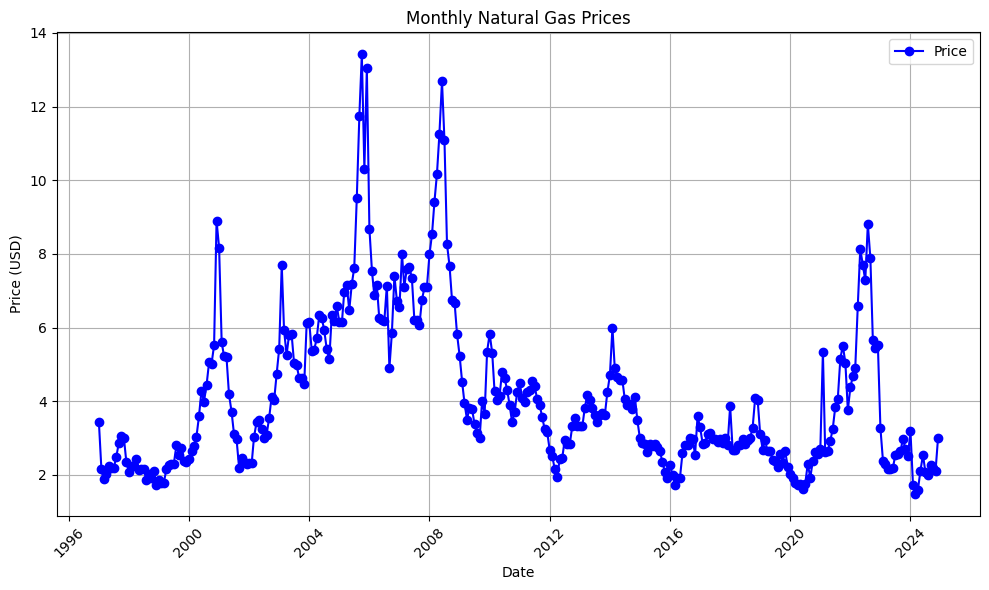

In [2]:
#Visualization
import matplotlib.pyplot as plt
import pandas as pd

# Load data
df = pd.read_csv('monthly_natural_gas_prices.csv')

# Convert DataFrame to JSON and save it as a file
df.to_json('natural_gas_prices.json', orient='records', lines=True)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create the line plot
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Price'], marker='o', color='b', label='Price')
plt.title('Monthly Natural Gas Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [4]:
import pandas as pd

# Load your CSV file
df = pd.read_csv('monthly_natural_gas_prices.csv')

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Save the DataFrame to a JSON file
df.to_json('natural_gas_prices.json', orient='records', lines=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_2260\553795831.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [5]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Natural Gas Prices Visualization</title>
    <!-- Include Vega and Vega-Lite libraries -->
    <script src="https://cdn.jsdelivr.net/npm/vega@5.21.0"></script>
    <script src="https://cdn.jsdelivr.net/npm/vega-lite@5.0.1"></script>
    <script src="https://cdn.jsdelivr.net/npm/vega-embed@6.15.0"></script>
</head>
<body>
    <h1>Natural Gas Prices Visualization</h1>
    <div id="vis"></div>
    
    <script type="text/javascript">
        // Make sure the JSON file path is correct here
        var yourData = 'natural_gas_prices.json';  // Path to your JSON file
        
        vegaEmbed('#vis', {
            "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
            "data": {
                "url": yourData
            },
            "mark": "line",
            "encoding": {
                "x": {
                    "field": "Date",
                    "type": "temporal",
                    "title": "Date"
                },
                "y": {
                    "field": "Price",
                    "type": "quantitative",
                    "title": "Price (USD)"
                }
            },
            "title": "Monthly Natural Gas Prices"
        }).catch(console.error);
    </script>
</body>
</html>

SyntaxError: invalid syntax (3149674602.py, line 1)

In [56]:
!pip show datapackage

Name: datapackage
Version: 1.15.4
Summary: Utilities to work with Data Packages as defined on specs.frictionlessdata.io
Home-page: https://github.com/frictionlessdata/datapackage-py
Author: Open Knowledge Foundation
Author-email: info@okfn.org
License: MIT
Location: c:\users\hp\miniconda3\envs\web-scrape\lib\site-packages
Requires: chardet, click, dataflows-tabulator, jsonpointer, jsonschema, requests, six, tableschema, unicodecsv
Required-by: 


In [63]:
{
  "profile": "tabular-data-package",
  "name": "natural-gas-prices",
  "title": "Natural Gas Prices Data",
  "version": "1.0.0",
  "resources": [
    {
      "name": "daily-prices",
      "path": "daily_natural_gas_prices.csv",
      "format": "csv",
      "schema": {
        "fields": [
          { "name": "Date", "type": "date" },
          { "name": "Price", "type": "number" }
        ]
      }
    },
    {
      "name": "monthly-prices",
      "path": "monthly_natural_gas_prices.csv",
      "format": "csv",
      "schema": {
        "fields": [
          { "name": "Date", "type": "date" },
          { "name": "Price", "type": "number" }
        ]
      }
    }
  ]
}

{'profile': 'tabular-data-package',
 'name': 'natural-gas-prices',
 'title': 'Natural Gas Prices Data',
 'version': '1.0.0',
 'resources': [{'name': 'daily-prices',
   'path': 'daily_natural_gas_prices.csv',
   'format': 'csv',
   'schema': {'fields': [{'name': 'Date', 'type': 'date'},
     {'name': 'Price', 'type': 'number'}]}},
  {'name': 'monthly-prices',
   'path': 'monthly_natural_gas_prices.csv',
   'format': 'csv',
   'schema': {'fields': [{'name': 'Date', 'type': 'date'},
     {'name': 'Price', 'type': 'number'}]}}]}

In [64]:
from datapackage import Package

# Define the metadata for the data package
package = Package({
    'profile': 'tabular-data-package',
    'name': 'natural-gas-prices',
    'title': 'Natural Gas Prices Data',
    'version': '1.0.0',
    'resources': [
        {
            'name': 'daily-prices',
            'path': 'daily_natural_gas_prices.csv',
            'format': 'csv',
            'schema': {
                'fields': [
                    { 'name': 'Date', 'type': 'date' },
                    { 'name': 'Price', 'type': 'number' }
                ]
            }
        },
        {
            'name': 'monthly-prices',
            'path': 'monthly_natural_gas_prices.csv',
            'format': 'csv',
            'schema': {
                'fields': [
                    { 'name': 'Date', 'type': 'date' },
                    { 'name': 'Price', 'type': 'number' }
                ]
            }
        }
    ]
})

# Save the datapackage.json file
package.save('datapackage.json')

True

In [65]:
import os
print(os.getcwd())

c:\users\hp\miniconda3\envs\web-scrape\lib\site-packages
